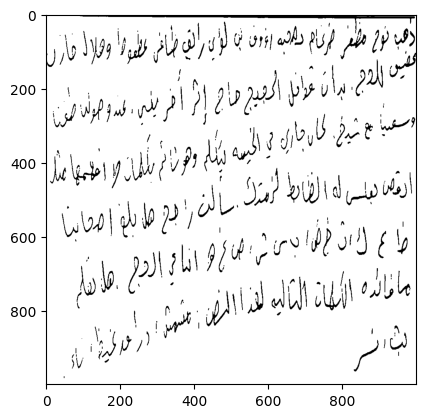

In [31]:
import cv2
import matplotlib.pyplot as plt

def resize_image(image_path, target_size=(1000, 1000)):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to the target size
    resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)


        # Apply median filter for noise removal
    img_median = cv2.medianBlur(resized_img, 3)

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

#Tests


Image2 = resize_image("KHATT_Wr0200_Para1.tif")
plt.imshow(Image2, cmap='gray')
Image1 = resize_image("KHATT_Wr0002_Para1.tif")
plt.imshow(Image1, cmap='gray')






In [30]:
import cv2
import numpy as np

def PenPressure(image):
    # Read the image using OpenCV
    #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to read the image.")
        return None

    # Flatten the 2D image array to a 1D array
    flattened_image = image.flatten()

    # Calculate mean and standard deviation of pixel intensities
    mean_intensity = np.mean(flattened_image)
    std_dev_intensity = np.std(flattened_image)

    return mean_intensity, std_dev_intensity

# Example usage:
result = PenPressure(Image1)

if result is not None:
    mean_intensity, std_dev_intensity = result
    print(f"Mean Intensity: {mean_intensity}")
    print(f"Standard Deviation of Intensity: {std_dev_intensity}")

result = PenPressure(Image2)

if result is not None:
    mean_intensity, std_dev_intensity = result
    print(f"Mean Intensity: {mean_intensity}")
    print(f"Standard Deviation of Intensity: {std_dev_intensity}")







Mean Intensity: 247.629785
Standard Deviation of Intensity: 26.512883318375145
Mean Intensity: 248.815595
Standard Deviation of Intensity: 25.700774381251147


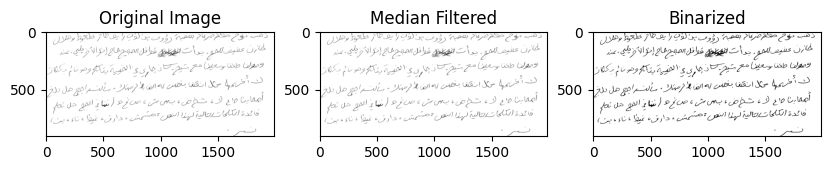

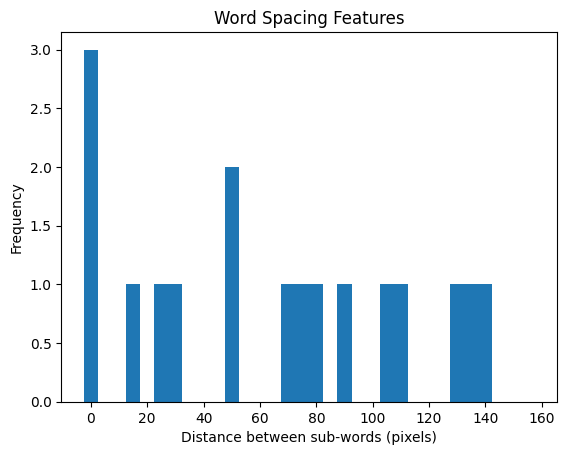

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter for noise removal
    img_median = cv2.medianBlur(img, 3)

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the original, median-filtered, and binarized images for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(img_median, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized')
    plt.show()

    return binary_image

def extract_word_spacing_features(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    # Find connected components (sub-words)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Extract word spacing features
    distances = []
    for i in range(1, len(stats)):
        # Calculate the distance between the last black pixel of the current word and the first black pixel of the next word
        distance = stats[i][0] - (stats[i - 1][0] + stats[i - 1][2])
        distances.append(distance)

    # Generate a histogram with 32 bins
    histogram, bin_edges = np.histogram(distances, bins=32, range=(0, 160))  # Adjust the range as needed

    # Plot the histogram
    plt.bar(bin_edges[:-1], histogram, width=5)  # Adjust the width based on the range
    plt.xlabel('Distance between sub-words (pixels)')
    plt.ylabel('Frequency')
    plt.title('Word Spacing Features')
    plt.show()

if __name__ == "__main__":
    # Provide the path to the image containing the Arabic text
    image_path = "KHATT_Wr0001_Para2.tif"
    
    # Call the function to extract and visualize word spacing features
    extract_word_spacing_features(image_path)

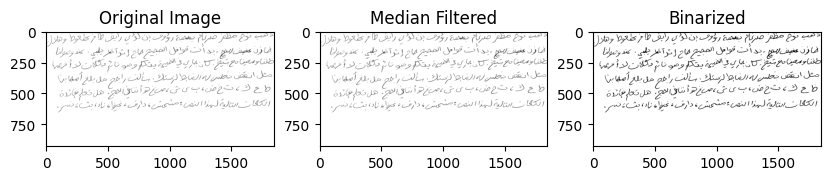

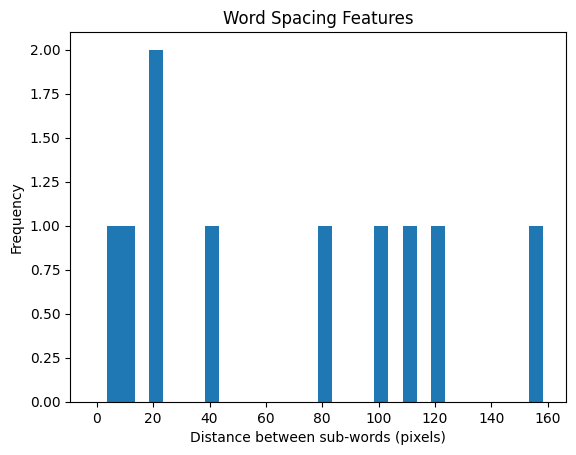

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter for noise removal
    img_median = cv2.medianBlur(img, 3)

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the original, median-filtered, and binarized images for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(img_median, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized')
    plt.show()

    return binary_image

def extract_word_spacing_features(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    # Find connected components (sub-words)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Extract word spacing features
    distances = []
    for i in range(1, len(stats)):
        # Calculate the distance between the last black pixel of the current word and the first black pixel of the next word
        distance = stats[i][0] - (stats[i - 1][0] + stats[i - 1][2])
        distances.append(distance)

    # Generate a histogram with 32 bins and a gap of 5
    bin_edges = np.arange(1, 165, 5)
    histogram, _ = np.histogram(distances, bins=bin_edges)

    # Plot the histogram
    plt.bar(bin_edges[:-1], histogram, width=5)
    plt.xlabel('Distance between sub-words (pixels)')
    plt.ylabel('Frequency')
    plt.title('Word Spacing Features')
    plt.show()

if __name__ == "__main__":
    # Provide the path to the image containing the Arabic text
    image_path = "KHATT_Wr0001_Para1.tif"
    
    # Call the function to extract and visualize word spacing features
    extract_word_spacing_features(image_path)

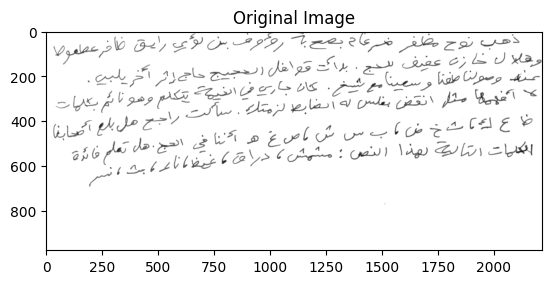

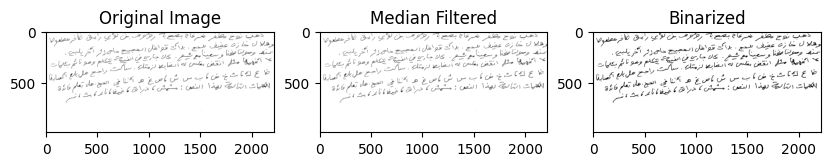

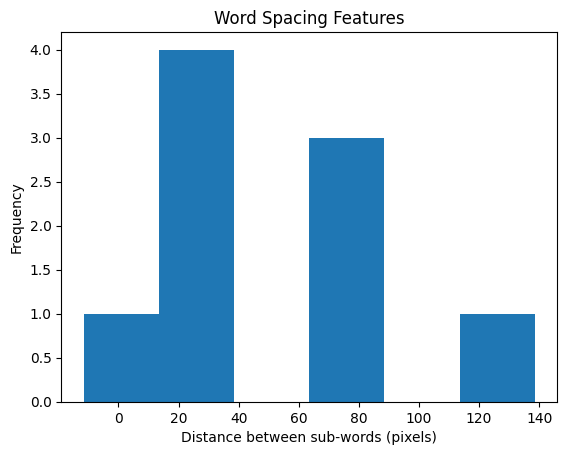

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Unable to read the image from the path: {image_path}")
        return None

    # Display the original image
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.show()

    # Apply median filter for noise removal
    img_median = cv2.medianBlur(img, 3)

    if img_median is None:
        print("Error: Median filter failed.")
        return None

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the median-filtered and binarized images for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(img_median, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized')
    plt.show()

    return binary_image

def extract_word_spacing_features(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    if binary_image is None:
        print("Error: Image preprocessing failed.")
        return

    # Find connected components (sub-words)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Extract word spacing features
    distances = []
    for i in range(1, len(stats)):
        # Calculate the distance between the last black pixel of the current word and the first black pixel of the next word
        distance = stats[i][0] - (stats[i - 1][0] + stats[i - 1][2])
        distances.append(distance)

    # Generate a histogram with 32 bins and a gap of 5
    bin_edges = np.arange(1, 165, 5)
    histogram, _ = np.histogram(distances, bins=bin_edges)

    # Accumulate frequencies for the grouped bins
    grouped_histogram = [sum(histogram[i:i+5]) for i in range(0, len(histogram)-4, 5)]
    grouped_bin_edges = np.arange(1, 160, 25)

    # Plot the grouped histogram
    plt.bar(grouped_bin_edges[:-1], grouped_histogram, width=25)
    plt.xlabel('Distance between sub-words (pixels)')
    plt.ylabel('Frequency')
    plt.title('Word Spacing Features')
    plt.show()

if __name__ == "__main__":
    # Provide the path to the image containing the Arabic text
    image_path = "KHATT_Wr0009_Para1.tif"
    
    # Call the function to extract and visualize word spacing features
    extract_word_spacing_features(image_path)

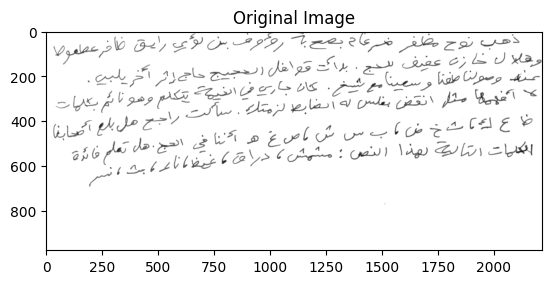

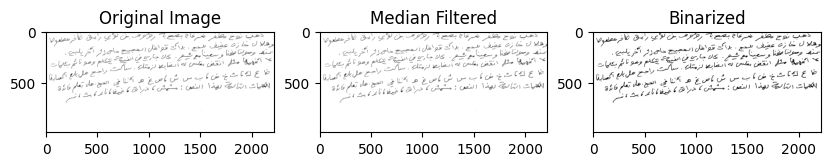

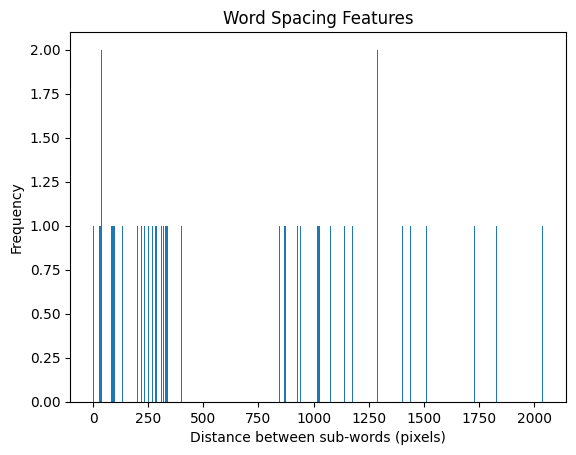

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Unable to read the image from the path: {image_path}")
        return None

    # Display the original image
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.show()

    # Apply median filter for noise removal
    img_median = cv2.medianBlur(img, 3)

    if img_median is None:
        print("Error: Median filter failed.")
        return None

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the median-filtered and binarized images for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(img_median, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized')
    plt.show()

    return binary_image

def extract_word_spacing_features(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    if binary_image is None:
        print("Error: Image preprocessing failed.")
        return

    # Find connected components (sub-words)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Extract word spacing features
    distances = []
    for i in range(1, len(stats)):
        # Calculate the distance between the last black pixel of the current word and the first black pixel of the next word
        distance = stats[i][0] - (stats[i - 1][0] + stats[i - 1][2])
        distances.append(distance)

    # Generate a histogram with 32 bins and a gap of 5
    bin_edges = np.arange(0, max(distances) + 5, 5)
    histogram, _ = np.histogram(distances, bins=bin_edges)

    # Plot the histogram
    plt.bar(bin_edges[:-1], histogram, width=5)
    plt.xlabel('Distance between sub-words (pixels)')
    plt.ylabel('Frequency')
    plt.title('Word Spacing Features')
    plt.show()

if __name__ == "__main__":
    # Provide the path to the image containing the Arabic text
    image_path = "KHATT_Wr0009_Para1.tif"
   
    # Call the function to extract and visualize word spacing features
    extract_word_spacing_features(image_path)

# CHATGPT

**Image Loading + Preprocessing**

In [32]:
import os
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the updated Excel file
updated_excel_file = 'updated_excel_file.xlsx'
data = pd.read_excel(updated_excel_file) # Load only the first 5 columns

# Set the new width and height
width, height = 500, 500
batch_size = 8


def preprocess_image(image):
    # Read the image
    #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    resized_image = cv2.resize(image, (width, height))
    # Noise removal with a 3x3 median filter
    resized_image = cv2.medianBlur(resized_image, 3)

    # Binarization using OTSU's method
    _, binary_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Dilation
    # Define the structuring element
    # For example, use a 3x3 rectangular structuring element
    kernel = np.ones((3, 3), np.uint8)
    # Apply dilation
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    return dilated_image

def load_images_and_labels(file_names_column, age_column, start_idx, end_idx):
    images_batch = []
    labels_batch = []
    
    for index in range(start_idx, end_idx):
        row = data.iloc[index]
        file_name = row[file_names_column]
        age = row[age_column]

        if pd.notnull(age) and pd.notnull(file_name):
            image = cv2.imread(os.path.join('./images', file_name), cv2.IMREAD_GRAYSCALE)
            #image = preprocess_image(image)
            images_batch.append(image)
            labels_batch.append(age)

    labels_batch = to_categorical(labels_batch, num_classes=2)
    images_batch = np.array(images_batch) / 255.0
    
    return images_batch, labels_batch

# Load all images and labels
all_images = []
all_labels = []

for start_idx in range(0, len(data), batch_size):
    end_idx = min(start_idx + batch_size, len(data))
    images_batch, labels_batch = load_images_and_labels('File Name', 'Gender', start_idx, end_idx)
    
    all_images.append(images_batch)
    all_labels.append(labels_batch)

# Concatenate the batches to create the final arrays
all_images = np.concatenate(all_images)
all_labels = np.concatenate(all_labels)

# Now, 'all_images' contains all the images and 'all_labels' contains their corresponding labels

# Example usage
print(all_images.shape)  # Print the shape of the array containing all images
print(all_labels.shape)  # Print the shape of the array containing all labels

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

[1. 0.]


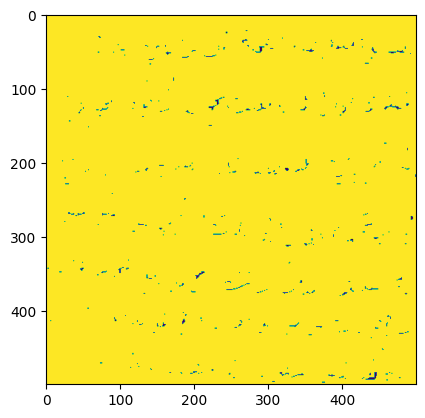

In [10]:
import matplotlib.pyplot as plt

plt.imshow(all_images[10])
print(all_labels[194])

<h4>Feature Extraction</h4>

In [37]:
import cv2
import numpy as np

#PEN PRESSURES Higher Mean = Lighter Text
def PenPressure(image):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to read the image.")
        return None

    # Flatten the 2D image array to a 1D array
    flattened_image = image.flatten()

    # Calculate mean and standard deviation of pixel intensities
    mean_intensity = np.mean(flattened_image)
    std_dev_intensity = np.std(flattened_image)

    return mean_intensity, std_dev_intensity


#test
result = PenPressure("KHATT_Wr0002_Para1.tif")

if result is not None:
    mean_intensity, std_dev_intensity = result
    print(f"Mean Intensity: {mean_intensity}")
    print(f"Standard Deviation of Intensity: {std_dev_intensity}")


Mean Intensity: 248.83993234817916
Standard Deviation of Intensity: 23.681195543791443


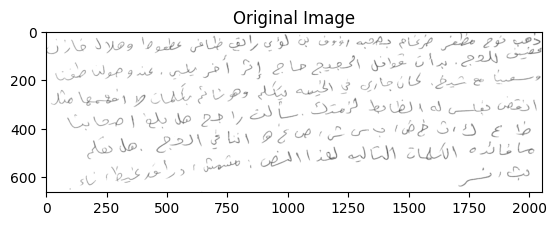

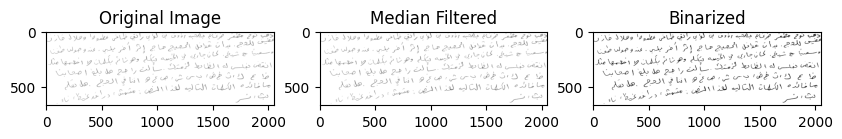

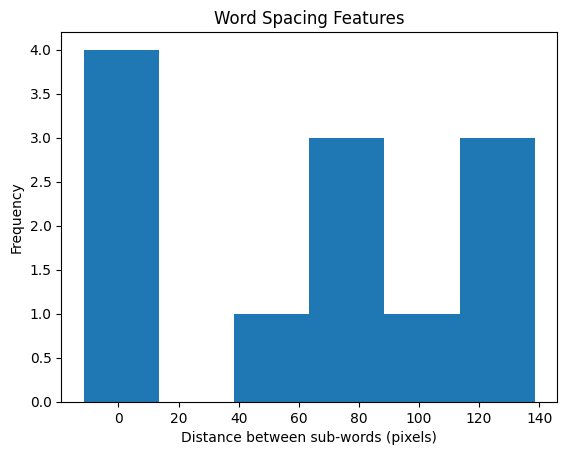

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Unable to read the image from the path: {image_path}")
        return None

    # Display the original image
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.show()

    # Apply median filter for noise removal
    img_median = cv2.medianBlur(img, 3)

    if img_median is None:
        print("Error: Median filter failed.")
        return None

    # Apply OTSU thresholding for binarization
    _, binary_image = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the median-filtered and binarized images for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(img_median, cmap='gray'), plt.title('Median Filtered')
    plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized')
    plt.show()

    return binary_image

def extract_word_spacing_features(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    if binary_image is None:
        print("Error: Image preprocessing failed.")
        return

    # Find connected components (sub-words)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Extract word spacing features
    distances = []
    for i in range(1, len(stats)):
        # Calculate the distance between the last black pixel of the current word and the first black pixel of the next word
        distance = stats[i][0] - (stats[i - 1][0] + stats[i - 1][2])
        distances.append(distance)

    # Generate a histogram with 32 bins and a gap of 5
    bin_edges = np.arange(1, 165, 5)
    histogram, _ = np.histogram(distances, bins=bin_edges)

    # Accumulate frequencies for the grouped bins
    grouped_histogram = [sum(histogram[i:i+5]) for i in range(0, len(histogram)-4, 5)]
    grouped_bin_edges = np.arange(1, 160, 25)

    # Plot the grouped histogram
    plt.bar(grouped_bin_edges[:-1], grouped_histogram, width=25)
    plt.xlabel('Distance between sub-words (pixels)')
    plt.ylabel('Frequency')
    plt.title('Word Spacing Features')
    plt.show()

if __name__ == "__main__":
    # Provide the path to the image containing the Arabic text
    image_path = "KHATT_Wr0002_Para1.tif"
    
    # Call the function to extract and visualize word spacing features
    extract_word_spacing_features(image_path)

In [36]:
import cv2
import numpy as np

def find_margins(imge):
    # Load the image
    img = cv2.imread(imge, cv2.IMREAD_GRAYSCALE)
    # Check if the image is loaded correctly
    if img is None:
        print("Error loading image")
        return

    # Apply a binary threshold to make the image black and white
    _, thresholded_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Initialize lists to store margin coordinates
    left_margins = []
    right_margins = []

    # Image dimensions
    height, width = thresholded_img.shape

    # Iterate over the first 200 rows
    for y in range(min(200, height)):
        row = thresholded_img[y]

        # Find the first black pixel from the left
        left_margin = np.argmax(row == 0)
        left_margins.append((left_margin, y))

        # Find the last black pixel from the right
        right_margin = width - np.argmax(row[::-1] == 0) - 1
        right_margins.append((right_margin, y))

    return left_margins, right_margins

# Example usage
left, right = find_margins("KHATT_Wr0001_Para2.tif")
print("Left Margins:", left)
print("Right Margins:", right)

Left Margins: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (510, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (513, 12), (513, 13), (513, 14), (514, 15), (274, 16), (274, 17), (274, 18), (274, 19), (496, 20), (496, 21), (278, 22), (278, 23), (497, 24), (376, 25), (375, 26), (375, 27), (275, 28), (375, 29), (276, 30), (376, 31), (376, 32), (377, 33), (377, 34), (378, 35), (378, 36), (379, 37), (379, 38), (332, 39), (179, 40), (334, 41), (335, 42), (336, 43), (337, 44), (211, 45), (382, 46), (382, 47), (280, 48), (280, 49), (380, 50), (281, 51), (281, 52), (281, 53), (115, 54), (347, 55), (145, 56), (145, 57), (146, 58), (146, 59), (115, 60), (116, 61), (148, 62), (115, 63), (115, 64), (172, 65), (171, 66), (171, 67), (170, 68), (170, 69), (169, 70), (169, 71), (168, 72), (115, 73), (166, 74), (115, 75), (114, 76), (163, 77), (163, 78), (161, 79), (113, 80), (113, 81), (112, 82), (112, 83), (111, 84), (111, 85), (111, 86), (151, 87), (110, 88), (109, 89), (108, 90), (108, 91), (107,

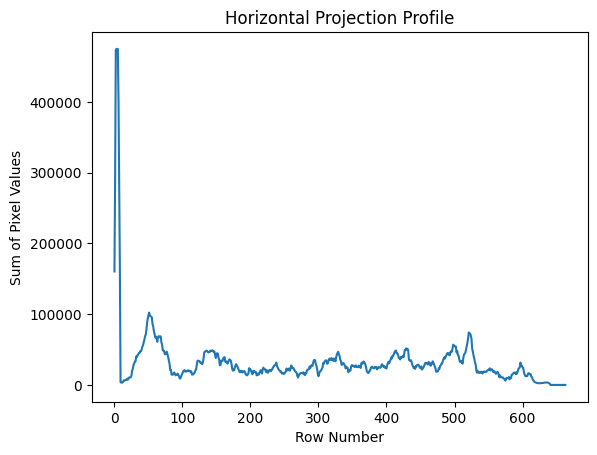

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def horizontal_projection_profile(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded correctly
    if img is None:
        print("Error loading image")
        return

    # Apply a binary threshold
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Dilate the image to emphasize text lines
    kernel = np.ones((5,5), np.uint8)
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

    # Compute the horizontal projection by summing along the columns
    projection = np.sum(dilated_img, axis=1)

    # Analyze the projection profile for irregularity
    # This can be sophisticated based on your specific criteria
    # For example, you might look at the variation in peak heights and distances

    # For visualization
    plt.plot(projection)
    plt.title("Horizontal Projection Profile")
    plt.xlabel("Row Number")
    plt.ylabel("Sum of Pixel Values")
    plt.show()

    return projection

# Example usage
profile = horizontal_projection_profile("KHATT_Wr0002_Para1.tif")

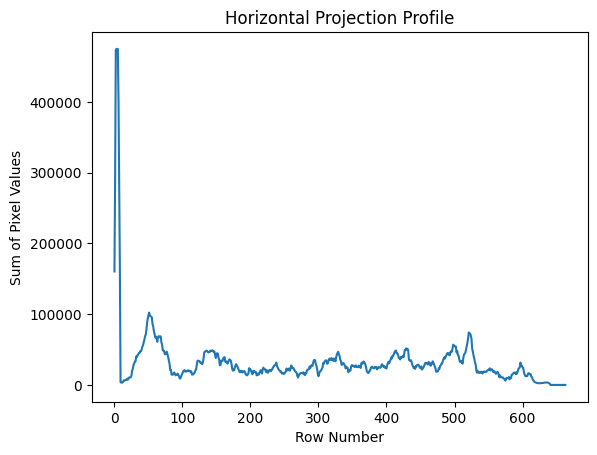

{'pen_pressure': (247.64681350829522, 26.984455792820388), 'left_margin': [(0, 0), (188, 1), (187, 2), (188, 3), (468, 4), (921, 5), (1401, 6), (1716, 7), (1716, 8), (1716, 9), (2022, 10), (2021, 11), (2022, 12), (1719, 13), (1718, 14), (989, 15), (989, 16), (990, 17), (844, 18), (843, 19), (843, 20), (843, 21), (844, 22), (844, 23), (844, 24), (844, 25), (844, 26), (844, 27), (844, 28), (698, 29), (698, 30), (844, 31), (400, 32), (400, 33), (400, 34), (400, 35), (400, 36), (400, 37), (212, 38), (212, 39), (213, 40), (213, 41), (214, 42), (215, 43), (215, 44), (216, 45), (216, 46), (217, 47), (218, 48), (218, 49), (218, 50), (219, 51), (220, 52), (220, 53), (221, 54), (221, 55), (221, 56), (222, 57), (151, 58), (153, 59), (224, 60), (161, 61), (162, 62), (224, 63), (46, 64), (46, 65), (46, 66), (47, 67), (47, 68), (47, 69), (47, 70), (47, 71), (48, 72), (48, 73), (48, 74), (48, 75), (47, 76), (47, 77), (48, 78), (48, 79), (263, 80), (89, 81), (261, 82), (45, 83), (45, 84), (605, 85), (

In [45]:
#Feature Extraction

def extract_features(image):
    # Implement feature extraction logic

    LM,RM = find_margins(image)
 

    features = {
        "pen_pressure": PenPressure(image),  
        "left_margin": LM,  
        "right_margin": RM,  
        #"word_spacing": None,  #can't figure this out
        "Projection": horizontal_projection_profile(image)
    }
    return features

# Example usage
#img = cv2.imread("KHATT_Wr0002_Para1.tif", cv2.IMREAD_GRAYSCALE)
features =  extract_features("KHATT_Wr0002_Para1.tif")

print(features)

In [46]:
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# SVM Classifier
def train_svm_classifier(features, labels):
    clf = SVC()
    clf.fit(features, labels)
    return clf

# ANN Classifier
def train_ann_classifier(features, labels):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(features.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # or softmax for multi-class
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(features, labels, epochs=10)
    return model

# Example usage
#svm_classifier = train_svm_classifier(train_features, train_labels)
#ann_classifier = train_ann_classifier(train_features, train_labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_model(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    return accuracy, precision, recall

# Example usage
# accuracy, precision, recall = evaluate_model(svm_classifier, test_features, test_labels)